# Install Library

In [ ]:
!pip install nltk

In [ ]:
!pip install gensim

In [ ]:
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 807.1 kB/s eta 0:00:00


In [ ]:
!pip install googletrans==4.0.0-rc1

# Import Library

In [ ]:
import pandas as pd  # For loading data from a file or dataframe
import re  # For regular expressions in cleaning
import nltk
from nltk.tokenize import word_tokenize  # For tokenization
from nltk.corpus import stopwords  # For stop word removal
from nltk.stem import PorterStemmer  # For stemming
from nltk.stem import WordNetLemmatizer  # For lemmatization
from google.colab import drive
from deep_translator import GoogleTranslator
# Load data (replace with your actual data loading method)
drive.mount('/content/drive/')
# Load the dataset
path ='/content/final1.xlsx'
reviews  = pd.read_excel(path)# Example for CSV file
reviews.dropna()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,full_text,username,case_folded,cleaning,translated_text
0,@night_owls_17 Gue sempet liat katanya gerakan...,noirbojack,@night_owls_17 gue sempet liat katanya gerakan...,owls gue sempet liat katanya gerakan perubahan...,"Owls, I see it, he said, the movement of chang..."
1,Sementara kita sebagian tim yg kalah aja tetap...,crazystay_,sementara kita sebagian tim yg kalah aja tetap...,sementara kita sebagian tim yg kalah aja tetap...,While we are some of the teams who loses just ...
2,@msaid_didu Di kampung saya 6 bln sebelum pilp...,FRENGKY87279068,@msaid_didu di kampung saya 6 bln sebelum pilp...,didu di kampung saya bln sebelum pilpres hamp...,Didu in my village month before the presidenti...
3,@Tan_Mar3M Anies mantan capres setelah pemilu ...,sahat1062,@tan_mar3m anies mantan capres setelah pemilu ...,marm anies mantan capres setelah pemilu dilakukan,Marm Anies former Presidential Candidate after...
4,@audreyprn1 @aniesbaswedan Anies nganggep pemi...,nonmirom,@audreyprn1 @aniesbaswedan anies nganggep pemi...,anies nganggep pemilu itu penting yang dimaksu...,"Anies thinks that the election is important, w..."
...,...,...,...,...,...
4250,mengingat pengabdian dan kontribusi yang diber...,UUtmah,mengingat pengabdian dan kontribusi yang diber...,mengingat pengabdian dan kontribusi yang diber...,considering that the dedication and contributi...
4251,Wah kmrn @Prabowo mendapatkan anugerah pangkat...,amiraratna30,wah kmrn @prabowo mendapatkan anugerah pangkat...,wah kmrn mendapatkan anugerah pangkat jendera...,"wow, you get the rank of the rank of the Honor..."
4252,Harapan kita adalah 2024 dipimpin oleh preside...,AlfianMaul19,harapan kita adalah 2024 dipimpin oleh preside...,harapan kita adalah dipimpin oleh presiden ya...,Our hope is led by the president who is firmly...
4253,Patut kita dukung Prabowo sebagai Presiden seb...,sanjaya478,patut kita dukung prabowo sebagai presiden seb...,patut kita dukung prabowo sebagai presiden seb...,We should support Prabowo as president because...


# Cleaning and preprocessing function

In [ ]:
# Cleaning and preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove punctuation and special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    return text

# Apply cleaning and preprocessing
#reviews['review'] = reviews['review_english'].astype(str) # Mulai dari sini
reviews['Text'] = reviews['translated_text'].astype(str)
reviews['cleaned_text'] = reviews['Text'].apply(clean_text)
reviews['cleaned_text'].head()

0    owls i see it he said the movement of change o...
1    while we are some of the teams who loses just ...
2    didu in my village month before the presidenti...
3    marm anies former presidential candidate after...
4    anies thinks that the election is important wh...
Name: cleaned_text, dtype: object

# Tokenization

In [ ]:
# Tokenization0
nltk.download('punkt')
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

reviews['tokens'] = reviews['cleaned_text'].apply(tokenize_text)
reviews['tokens'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [owls, i, see, it, he, said, the, movement, of...
1    [while, we, are, some, of, the, teams, who, lo...
2    [didu, in, my, village, month, before, the, pr...
3    [marm, anies, former, presidential, candidate,...
4    [anies, thinks, that, the, election, is, impor...
Name: tokens, dtype: object

# Stop word removal

In [ ]:
# Stop word removal
nltk.download('stopwords')
stop_words = set(stopwords.words("english","indonesia"))  # Adjust for language
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

reviews['filtered_tokens'] = reviews['tokens'].apply(remove_stopwords)
reviews['filtered_tokens'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [owls, see, said, movement, change, something,...
1    [teams, loses, keep, relaxing, week, typhoon, ...
2    [didu, village, month, presidential, election,...
3    [marm, anies, former, presidential, candidate,...
4    [anies, thinks, election, important, meant, us...
Name: filtered_tokens, dtype: object

# Stemming or lemmatization (choose one or both)

In [ ]:
# Stemming or lemmatization (choose one or both)
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply stemming or lemmatization
reviews['stemmed_tokens'] = reviews['filtered_tokens'].apply(stem_tokens)  # Or lemmatize_tokens
#reviews['stemmed_tokens'] = reviews['filtered_tokens'].apply(lemmatize_tokens)  # Or lemmatize_tokens
reviews['stemmed_tokens'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [owl, see, said, movement, chang, someth, cont...
1    [team, lose, keep, relax, week, typhoon, elect...
2    [didu, villag, month, presidenti, elect, almos...
3    [marm, ani, former, presidenti, candid, elect,...
4    [ani, think, elect, import, meant, us, commun,...
Name: stemmed_tokens, dtype: object

In [ ]:
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   full_text        4255 non-null   object
 1   username         4255 non-null   object
 2   case_folded      4255 non-null   object
 3   cleaning         4255 non-null   object
 4   translated_text  4255 non-null   object
 5   Text             4255 non-null   object
 6   cleaned_text     4255 non-null   object
 7   tokens           4255 non-null   object
 8   filtered_tokens  4255 non-null   object
 9   stemmed_tokens   4255 non-null   object
dtypes: object(10)
memory usage: 332.5+ KB


,full_text,username,case_folded,cleaning,translated_text,Text,cleaned_text,tokens,filtered_tokens,stemmed_tokens
0,@night_owls_17 Gue sempet liat katanya gerakan...,noirbojack,@night_owls_17 gue sempet liat katanya gerakan...,owls gue sempet liat katanya gerakan perubahan...,"Owls, I see it, he said, the movement of chang...","Owls, I see it, he said, the movement of chang...",owls i see it he said the movement of change o...,"[owls, i, see, it, he, said, the, movement, of...","[owls, see, said, movement, change, something,...","[owl, see, said, movement, chang, someth, cont..."
1,Sementara kita sebagian tim yg kalah aja tetap...,crazystay_,sementara kita sebagian tim yg kalah aja tetap...,sementara kita sebagian tim yg kalah aja tetap...,While we are some of the teams who loses just ...,While we are some of the teams who loses just ...,while we are some of the teams who loses just ...,"[while, we, are, some, of, the, teams, who, lo...","[teams, loses, keep, relaxing, week, typhoon, ...","[team, lose, keep, relax, week, typhoon, elect..."
2,@msaid_didu Di kampung saya 6 bln sebelum pilp...,FRENGKY87279068,@msaid_didu di kampung saya 6 bln sebelum pilp...,didu di kampung saya bln sebelum pilpres hamp...,Didu in my village month before the presidenti...,Didu in my village month before the presidenti...,didu in my village month before the presidenti...,"[didu, in, my, village, month, before, the, pr...","[didu, village, month, presidential, election,...","[didu, villag, month, presidenti, elect, almos..."
3,@Tan_Mar3M Anies mantan capres setelah pemilu ...,sahat1062,@tan_mar3m anies mantan capres setelah pemilu ...,marm anies mantan capres setelah pemilu dilakukan,Marm Anies former Presidential Candidate after...,Marm Anies former Presidential Candidate after...,marm anies former presidential candidate after...,"[marm, anies, former, presidential, candidate,...","[marm, anies, former, presidential, candidate,...","[marm, ani, former, presidenti, candid, elect,..."
4,@audreyprn1 @aniesbaswedan Anies nganggep pemi...,nonmirom,@audreyprn1 @aniesbaswedan anies nganggep pemi...,anies nganggep pemilu itu penting yang dimaksu...,"Anies thinks that the election is important, w...","Anies thinks that the election is important, w...",anies thinks that the election is important wh...,"[anies, thinks, that, the, election, is, impor...","[anies, thinks, election, important, meant, us...","[ani, think, elect, import, meant, us, commun,..."


Labeling with VADER

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

reviews['sentiment_vader'] = reviews['stemmed_tokens'].apply(lambda tokens: analyzer.polarity_scores(' '.join(tokens)))

# Extract positive, negative, and neutral scores
reviews['sentiment_positive'] = reviews['sentiment_vader'].apply(lambda scores: scores['pos'])
reviews['sentiment_negative'] = reviews['sentiment_vader'].apply(lambda scores: scores['neg'])
reviews['sentiment_neutral'] = reviews['sentiment_vader'].apply(lambda scores: scores['neu'])
reviews['sentiment_compound'] = reviews['sentiment_vader'].apply(lambda scores: scores['compound'])

reviews['sentiment_label'] = reviews['sentiment_compound'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))
reviews['sentiment_score'] = reviews['sentiment_compound'].apply(lambda score: 1 if score > 0 else ('0' if score < 0 else 2))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
reviews.head()

,full_text,username,case_folded,cleaning,translated_text,Text,cleaned_text,tokens,filtered_tokens,stemmed_tokens,sentiment_vader,sentiment_positive,sentiment_negative,sentiment_neutral,sentiment_compound,sentiment_label,sentiment_score
0,@night_owls_17 Gue sempet liat katanya gerakan...,noirbojack,@night_owls_17 gue sempet liat katanya gerakan...,owls gue sempet liat katanya gerakan perubahan...,"Owls, I see it, he said, the movement of chang...","Owls, I see it, he said, the movement of chang...",owls i see it he said the movement of change o...,"[owls, i, see, it, he, said, the, movement, of...","[owls, see, said, movement, change, something,...","[owl, see, said, movement, chang, someth, cont...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2
1,Sementara kita sebagian tim yg kalah aja tetap...,crazystay_,sementara kita sebagian tim yg kalah aja tetap...,sementara kita sebagian tim yg kalah aja tetap...,While we are some of the teams who loses just ...,While we are some of the teams who loses just ...,while we are some of the teams who loses just ...,"[while, we, are, some, of, the, teams, who, lo...","[teams, loses, keep, relaxing, week, typhoon, ...","[team, lose, keep, relax, week, typhoon, elect...","{'neg': 0.271, 'neu': 0.486, 'pos': 0.243, 'co...",0.243,0.271,0.486,-0.2500,negative,0
2,@msaid_didu Di kampung saya 6 bln sebelum pilp...,FRENGKY87279068,@msaid_didu di kampung saya 6 bln sebelum pilp...,didu di kampung saya bln sebelum pilpres hamp...,Didu in my village month before the presidenti...,Didu in my village month before the presidenti...,didu in my village month before the presidenti...,"[didu, in, my, village, month, before, the, pr...","[didu, village, month, presidential, election,...","[didu, villag, month, presidenti, elect, almos...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2
3,@Tan_Mar3M Anies mantan capres setelah pemilu ...,sahat1062,@tan_mar3m anies mantan capres setelah pemilu ...,marm anies mantan capres setelah pemilu dilakukan,Marm Anies former Presidential Candidate after...,Marm Anies former Presidential Candidate after...,marm anies former presidential candidate after...,"[marm, anies, former, presidential, candidate,...","[marm, anies, former, presidential, candidate,...","[marm, ani, former, presidenti, candid, elect,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2
4,@audreyprn1 @aniesbaswedan Anies nganggep pemi...,nonmirom,@audreyprn1 @aniesbaswedan anies nganggep pemi...,anies nganggep pemilu itu penting yang dimaksu...,"Anies thinks that the election is important, w...","Anies thinks that the election is important, w...",anies thinks that the election is important wh...,"[anies, thinks, that, the, election, is, impor...","[anies, thinks, election, important, meant, us...","[ani, think, elect, import, meant, us, commun,...","{'neg': 0.106, 'neu': 0.745, 'pos': 0.149, 'co...",0.149,0.106,0.745,0.2732,positive,1


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_text           4255 non-null   object 
 1   username            4255 non-null   object 
 2   case_folded         4255 non-null   object 
 3   cleaning            4255 non-null   object 
 4   translated_text     4255 non-null   object 
 5   Text                4256 non-null   object 
 6   cleaned_text        4256 non-null   object 
 7   tokens              4256 non-null   object 
 8   filtered_tokens     4256 non-null   object 
 9   stemmed_tokens      4256 non-null   object 
 10  sentiment_vader     4256 non-null   object 
 11  sentiment_positive  4256 non-null   float64
 12  sentiment_negative  4256 non-null   float64
 13  sentiment_neutral   4256 non-null   float64
 14  sentiment_compound  4256 non-null   float64
 15  sentiment_label     4256 non-null   object 
 16  sentim

# Word Frequencies

In [ ]:
from collections import Counter

reviews['word_counts'] = reviews['stemmed_tokens'].apply(lambda tokens: Counter(tokens))
reviews['word_counts'].head()

0    {'owl': 1, 'see': 1, 'said': 1, 'movement': 2,...
1    {'team': 1, 'lose': 1, 'keep': 1, 'relax': 1, ...
2    {'didu': 1, 'villag': 3, 'month': 1, 'presiden...
3    {'marm': 1, 'ani': 1, 'former': 1, 'presidenti...
4    {'ani': 1, 'think': 1, 'elect': 2, 'import': 1...
Name: word_counts, dtype: object

In [ ]:
reviews.head()

,full_text,username,case_folded,cleaning,translated_text,Text,cleaned_text,tokens,filtered_tokens,stemmed_tokens,sentiment_vader,sentiment_positive,sentiment_negative,sentiment_neutral,sentiment_compound,sentiment_label,sentiment_score,word_counts
0,@pro_gibran_ Pemilu ulang ini menunjukkan raky...,ARasa_16,@pro_gibran_ pemilu ulang ini menunjukkan raky...,gibran pemilu ulang ini menunjukkan rakyat sem...,This re -election gibran shows that more peopl...,This re -election gibran shows that more peopl...,this re election gibran shows that more people...,"[this, re, election, gibran, shows, that, more...","[election, gibran, shows, people, choose, prab...","[elect, gibran, show, peopl, choos, prabowo, g...","{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",0.000,0.213,0.787,-0.4019,negative,0,"{'elect': 1, 'gibran': 2, 'show': 1, 'peopl': ..."
1,@AraituLaki 2019 Prabowo dicurangi dan sekaran...,BuchroniK,@araitulaki 2019 prabowo dicurangi dan sekaran...,prabowo dicurangi dan sekarang merasa menang s...,Prabowo is cheated and now feels winning after...,Prabowo is cheated and now feels winning after...,prabowo is cheated and now feels winning after...,"[prabowo, is, cheated, and, now, feels, winnin...","[prabowo, cheated, feels, winning, joining, lo...","[prabowo, cheat, feel, win, join, loud, even, ...","{'neg': 0.096, 'neu': 0.607, 'pos': 0.297, 'co...",0.297,0.096,0.607,0.7430,positive,1,"{'prabowo': 1, 'cheat': 1, 'feel': 1, 'win': 1..."
2,Gelang Jenderal Kehormatan Prabowo ini seharus...,borju_1s,gelang jenderal kehormatan prabowo ini seharus...,gelang jenderal kehormatan prabowo ini seharus...,Prabowo's Honorary General Bracelet should be ...,Prabowo's Honorary General Bracelet should be ...,prabowos honorary general bracelet should be g...,"[prabowos, honorary, general, bracelet, should...","[prabowos, honorary, general, bracelet, given,...","[prabowo, honorari, gener, bracelet, given, la...","{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.241,0.000,0.759,0.5423,positive,1,"{'prabowo': 1, 'honorari': 1, 'gener': 1, 'bra..."
3,@Miduk17 Coba cek Den Ganjar setelah pemilu ad...,CahKeren212,@miduk17 coba cek den ganjar setelah pemilu ad...,coba cek den ganjar setelah pemilu ada lai lar...,Try checking den Ganjar after the election the...,Try checking den Ganjar after the election the...,try checking den ganjar after the election the...,"[try, checking, den, ganjar, after, the, elect...","[try, checking, den, ganjar, election, lai, ru...","[tri, check, den, ganjar, elect, lai, run, mor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2,"{'tri': 1, 'check': 1, 'den': 1, 'ganjar': 1, ..."
4,@PartaiSocmed tweet ini nyampe di otak gua ky ...,tn_arya,@partaisocmed tweet ini nyampe di otak gua ky ...,tweet ini nyampe di otak gua ky gini acara kam...,This tweet arrived in my brain Ky like this Ka...,This tweet arrived in my brain Ky like this Ka...,this tweet arrived in my brain ky like this ka...,"[this, tweet, arrived, in, my, brain, ky, like...","[tweet, arrived, brain, ky, like, kamisan, ram...","[tweet, arriv, brain, ky, like, kamisan, rame,...","{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...",0.152,0.000,0.848,0.3612,positive,1,"{'tweet': 1, 'arriv': 1, 'brain': 1, 'ky': 1, ..."


# Export Data Cleaning

In [ ]:
reviews.to_excel('/content/drive/MyDrive/dataset/prabowodone.xlsx', index=False)

# Data Exploration and Visualization

In [ ]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Descriptive statistics
print(reviews['Text'].str.len().describe())  # Review length statistics
#print(reviews['star'].describe())  # Rating distribution statistics

count    4255.000000
mean      174.871445
std        80.029518
min        10.000000
25%       106.500000
50%       172.000000
75%       243.000000
max       386.000000
Name: Text, dtype: float64


In [ ]:
from collections import Counter
# Word frequencies
word_counts = Counter(reviews['stemmed_tokens'].sum())
print(word_counts.most_common(20))  # Top 20 most frequent words

[('elect', 2648), ('ani', 2263), ('prabowo', 1803), ('ganjar', 1354), ('presid', 1176), ('lose', 1063), ('lost', 825), ('presidenti', 779), ('support', 677), ('candid', 579), ('jokowi', 577), ('mr', 548), ('peopl', 541), ('win', 496), ('want', 441), ('still', 427), ('pak', 409), ('like', 366), ('even', 344), ('parti', 344)]


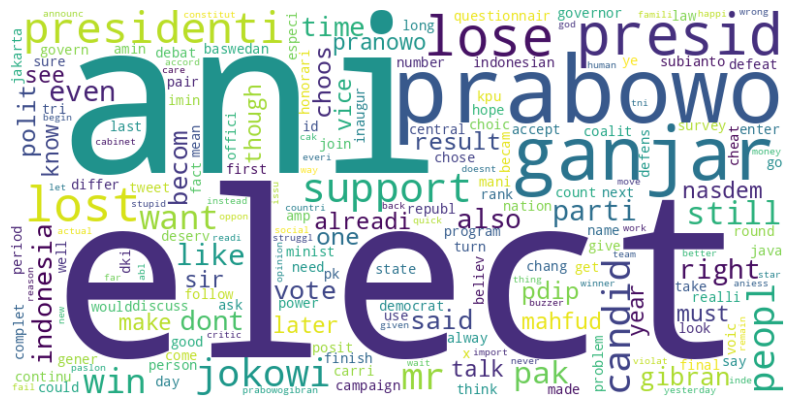

In [ ]:
# Visualizations

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
reviews['sentiment_label'].value_counts()

positive    685
negative    681
neutral     185
Name: sentiment_label, dtype: int64

In [ ]:
# Data quality checks
print(reviews.isnull().sum())  # Check for missing values

full_text             1
username              1
case_folded           1
cleaning              1
translated_text       1
Text                  0
cleaned_text          0
tokens                0
filtered_tokens       0
stemmed_tokens        0
sentiment_vader       0
sentiment_positive    0
sentiment_negative    0
sentiment_neutral     0
sentiment_compound    0
sentiment_label       0
sentiment_score       0
word_counts           0
dtype: int64


In [ ]:
reviews = reviews.astype(str)
reviews.drop_duplicates()
print(reviews.duplicated().sum())  # Check for duplicate reviews

283


# The balanced distribution

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Split data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(reviews['stemmed_tokens'], reviews['sentiment_label'], test_size=0.15, random_state=42)

# Check for class imbalance
sentiment_counts = y_train.value_counts()
print(sentiment_counts)

# If imbalanced, apply oversampling or undersampling techniques
if sentiment_counts.min() / sentiment_counts.max() < 0.3:  # Example threshold for imbalance
    # Oversample minority class
    X_train_over, y_train_over = resample(X_train[y_train == sentiment_counts.idxmin()],
                                          y_train[y_train == sentiment_counts.idxmin()],
                                          replace=True,
                                          n_samples=sentiment_counts.max())
    X_train = pd.concat([X_train, X_train_over])
    y_train = pd.concat([y_train, y_train_over])
else:
    # Optionally, consider undersampling the majority class
    pass

print(y_train.value_counts())  # Check the balanced distribution

positive    1651
negative    1335
neutral      631
Name: sentiment_label, dtype: int64
positive    1651
negative    1335
neutral      631
Name: sentiment_label, dtype: int64


# Feature Engineering

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features from cleaned reviews
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train the model
model_linear_regression = LogisticRegression()
model_linear_regression.fit(X_train_features, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict sentiment on test data
y_pred = model_linear_regression.predict(X_test_features)

# Evaluate model performance using accuracy, precision, recall, and F1-score
accuracy_linear_regression = accuracy_score(y_test, y_pred)
precision_linear_regression = precision_score(y_test, y_pred, average="weighted")
recall_linear_regression = recall_score(y_test, y_pred, average="weighted")
f1_linear_regression = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy_linear_regression:.4f}")
print(f"Precision: {precision_linear_regression:.4f}")
print(f"Recall: {recall_linear_regression:.4f}")
print(f"F1-score: {f1_linear_regression:.4f}")

Accuracy: 0.7746
Precision: 0.7812
Recall: 0.7746
F1-score: 0.7717


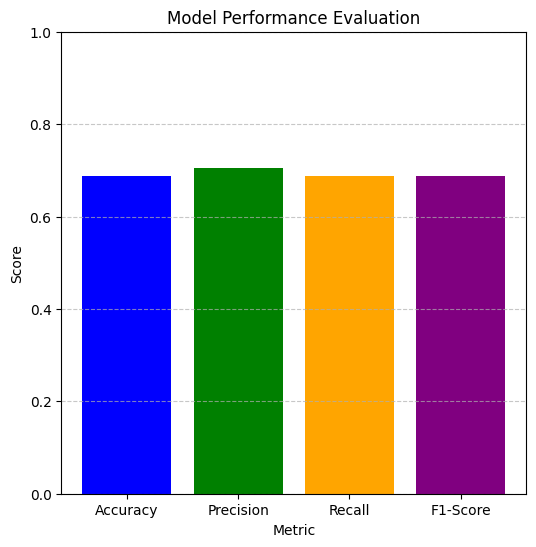

In [ ]:
# Define metric names and corresponding values
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy_linear_regression, precision_linear_regression, recall_linear_regression, f1_linear_regression]

# Create the bar chart
plt.figure(figsize=(6, 6))
plt.bar(metrics, values, color=['b', 'g', 'orange', 'purple'])
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance Evaluation")
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1 for all metrics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

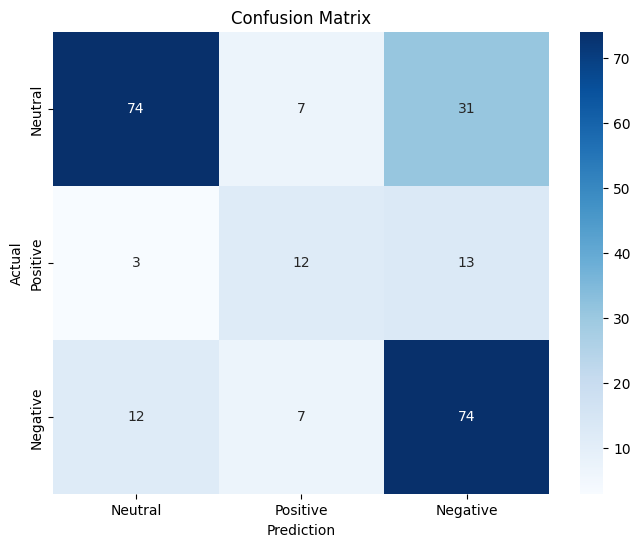

In [ ]:
# Menghitung confusion matrix
conf_matrix_linear_regression = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear_regression, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral', 'Positive', 'Negative'], yticklabels=['Neutral', 'Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
model_naive_bayes = MultinomialNB()
model_naive_bayes.fit(X_train_features, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict sentiment on test data
y_pred = model_naive_bayes.predict(X_test_features)

# Evaluate model performance using accuracy, precision, recall, and F1-score
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
precision_naive_bayes = precision_score(y_test, y_pred, average="weighted")
recall_naive_bayes = recall_score(y_test, y_pred, average="weighted")
f1_naive_bayes = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy_naive_bayes:.4f}")
print(f"Precision: {precision_naive_bayes:.4f}")
print(f"Recall: {recall_naive_bayes:.4f}")
print(f"F1-score: {f1_naive_bayes:.4f}")

Accuracy: 0.5494
Precision: 0.6243
Recall: 0.5494
F1-score: 0.5542


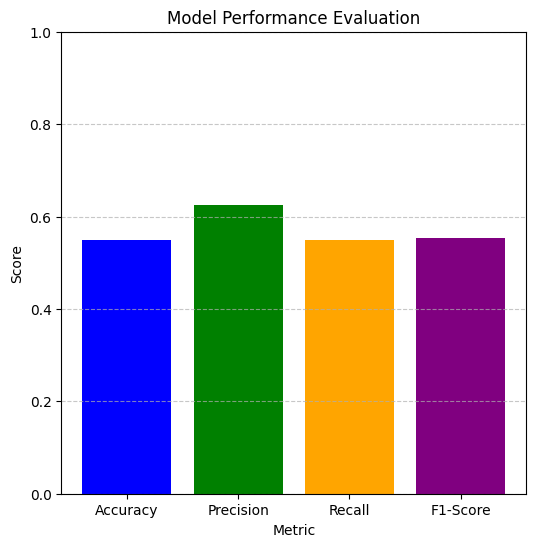

In [ ]:
# Define metric names and corresponding values
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy_naive_bayes, precision_naive_bayes, recall_naive_bayes, f1_naive_bayes]

# Create the bar chart
plt.figure(figsize=(6, 6))
plt.bar(metrics, values, color=['b', 'g', 'orange', 'purple'])
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance Evaluation")
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1 for all metrics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

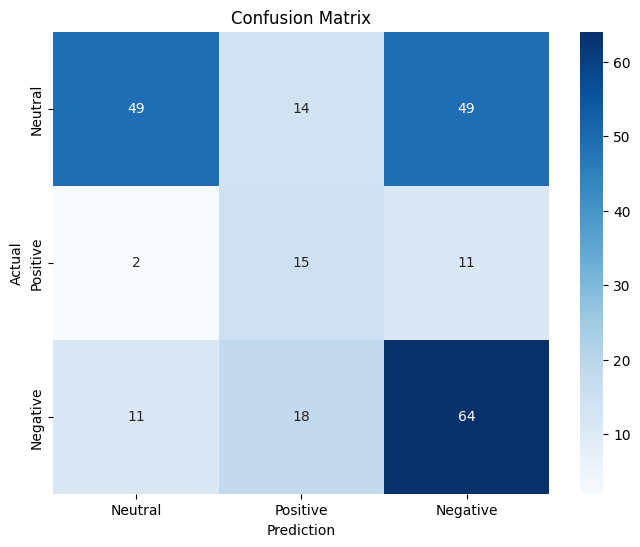

In [ ]:
# Menghitung confusion matrix
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_naive_bayes, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral', 'Positive', 'Negative'], yticklabels=['Neutral', 'Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC # "Support vector classifier"
# Train the model
model_svm = SVC(kernel='linear', C=1E10)
model_svm.fit(X_train_features, y_train)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict sentiment on test data
y_pred = model_svm.predict(X_test_features)

# Evaluate model performance using accuracy, precision, recall, and F1-score
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average="weighted")
recall_svm = recall_score(y_test, y_pred, average="weighted")
f1_svm = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

Accuracy: 0.7167
Precision: 0.7099
Recall: 0.7167
F1-score: 0.6963


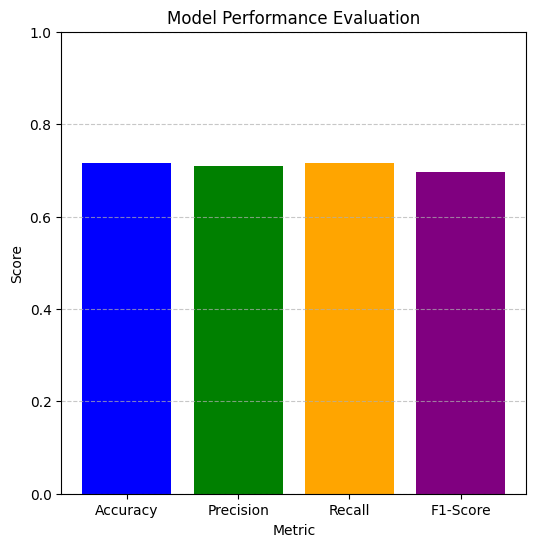

In [ ]:
# Define metric names and corresponding values
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy_svm, precision_svm, recall_svm, f1_svm]

# Create the bar chart
plt.figure(figsize=(6, 6))
plt.bar(metrics, values, color=['b', 'g', 'orange', 'purple'])
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance Evaluation")
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1 for all metrics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

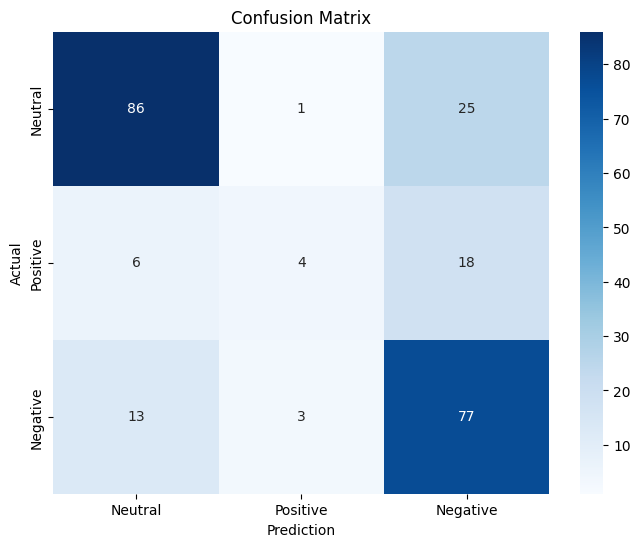

In [ ]:
# Menghitung confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral', 'Positive', 'Negative'], yticklabels=['Neutral', 'Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# Evaluation

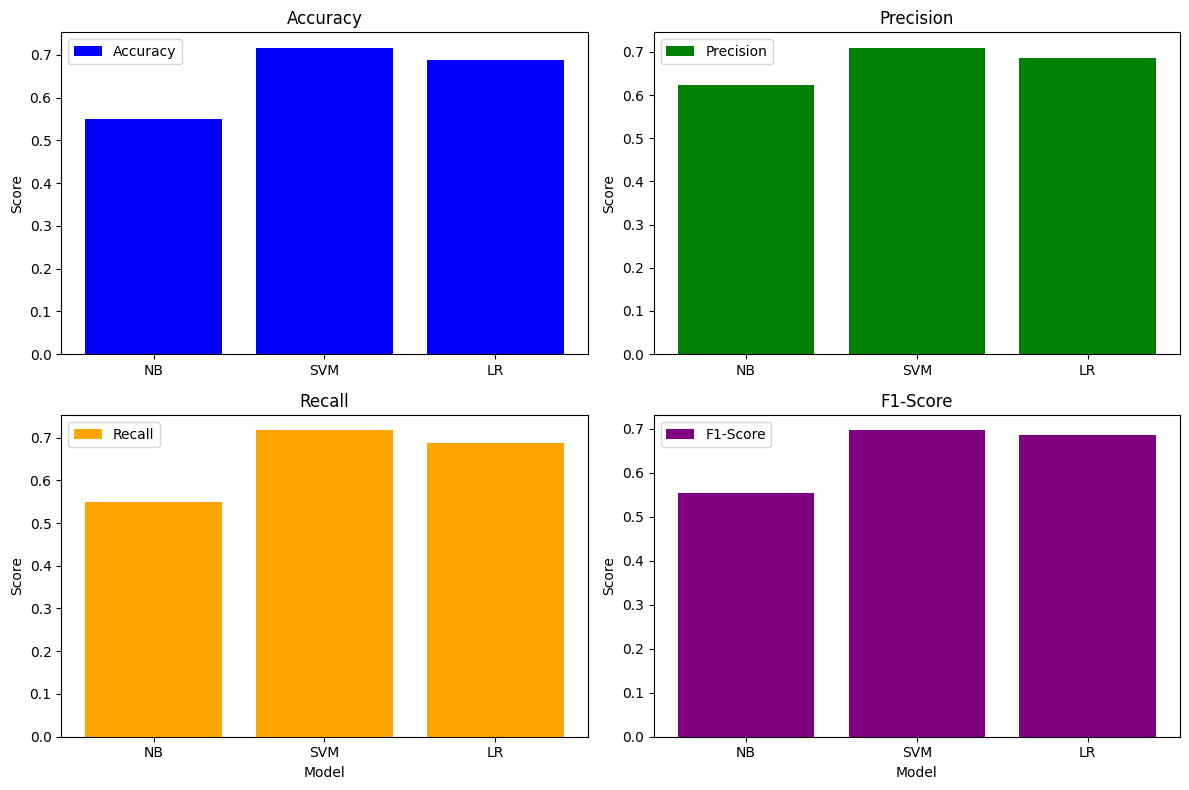

In [ ]:
# Define model names and metric values
model_names = ["NB", "SVM" ,"LR"]
accuracy_values = [accuracy_naive_bayes, accuracy_svm,accuracy_linear_regression]
precision_values = [precision_naive_bayes,precision_svm,accuracy_linear_regression]
recall_values = [recall_naive_bayes, recall_svm,accuracy_linear_regression]
f1_values = [f1_naive_bayes, f1_svm, accuracy_linear_regression]

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axes[0, 0].bar(model_names, accuracy_values, color='b', label='Accuracy')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Score')
axes[0, 0].legend()

# Plot precision
axes[0, 1].bar(model_names, precision_values, color='g', label='Precision')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylabel('Score')
axes[0, 1].legend()

# Plot recall
axes[1, 0].bar(model_names, recall_values, color='orange', label='Recall')
axes[1, 0].set_title('Recall')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Score')
axes[1, 0].legend()

# Plot F1-score
axes[1, 1].bar(model_names, f1_values, color='purple', label='F1-Score')
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()

# Adjust layout and display chart
fig.tight_layout()
plt.show()

In [ ]:
from deep_translator import GoogleTranslator
new_text = input("\nPlease Input Teks: ")
new_text_list = [new_text]  # Convert the input string to a list

#Translation From Bahasa To English
translator = GoogleTranslator(source="id", target="en")
translation = translator.translate(new_text)
print("Terjemahan: ", translation)
new_text_list = [translation]  # Convert the input string to a list

new_text_vec = vectorizer.transform(new_text_list)
# model_linear_regression
# model_naive_bayes
# model_svm

predicted_sentiment = model_decision_tree.predict(new_text_vec)

print("The Result of Sentiment Analysis is: ", predicted_sentiment[0])


Please Input Teks: asd
Terjemahan:  asd
The Result of Sentiment Analysis is:  negative
